# Laboratorio 5 - Ecuacion Normal Aprendizaje estadistico

  Por : Nicolas Osorno Roa


Solucion Para $\Theta$, atra vez de la ecuacion de coste

Partiendo de la funcion de coste escrita en forma matricial:

$J(\theta_1,\theta_2,\theta_3, ...,\theta_n )=\frac{1}{2m} \sum_{i = 1}^m (\Theta^{T} X - \hat{y}^{(i)})^2$

con $X \in R^{n\times m}$ ,  $X^T \in R^{m\times n}$

con $Y \in R^{m \times 1}$,  $Y^T \in R^{1 \times m}$

con $\Theta \in R^{n \times 1}$, $\Theta^T \in R^{1 \times n}$

Luego la función de coste puede ser escrita como:

$J= (\Theta ^T X - Y^T)(\Theta ^T X - Y^T)^T$

$J= (\Theta ^T X) (\Theta ^T X)^T - (\Theta ^T X) Y - Y^T (\Theta ^T X)^T+ Y^TY $


$J= (\Theta ^T X) (\Theta ^T X)^T - (Y^T(\Theta ^T X)^T)^T  - Y^T (\Theta ^T X)^T+ Y^TY $

$J= (\Theta ^T X) (\Theta ^T X)^T - 2(\Theta ^T X)Y  + Y^TY $


Como queremos hallar un minimo, se debe cumplir la condición:

$\frac{d J}{d\Theta} =  0$

$\frac{d J}{d\Theta} = X(\Theta^T X)^T + (\Theta ^T X) X^T-2XY$

$\frac{d J}{d\Theta} = 2 X(\Theta^T X)^T -2XY$

$\frac{d J}{d\Theta} = 2 X(X^T \Theta) -2XY$


$2 X(X^T \Theta) -2XY = 0$

$(X X^T)\Theta = XY$

$(X X^T)(X X^T)^{-1}\Theta = (X X^T)^{-1}XY$

$\Theta = (X X^T)^{-1}XY$


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

df = pd.DataFrame({"mean_":target, "rm":data[:,5]})
df

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1330100972.py:7: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


,mean_,rm
0,24.0,6.575
1,21.6,6.421
2,34.7,7.185
3,33.4,6.998
4,36.2,7.147
...,...,...
501,22.4,6.593
502,20.6,6.120
503,23.9,6.976
504,22.0,6.794


Text(0.5, 0, 'RM')

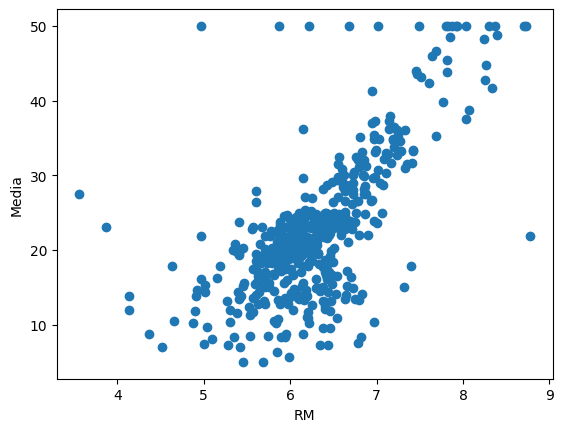

In [34]:
plt.scatter(df.rm, df.mean_)
plt.ylabel("Media")
plt.xlabel("RM")

In [35]:

df["ones"] = np.ones(len(target))

X = df[["ones","rm"]]
Y = np.reshape(df["mean_"].values,(len(X),1))
X = np.matrix(X)

theta = ((X.T@X).I)@X.T@Y
theta

matrix([[-34.67062078],
        [  9.10210898]])

Text(0.5, 0, 'RM')

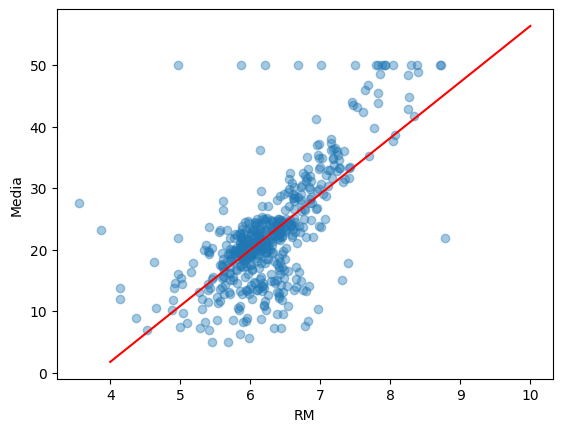

In [36]:
theta = np.array(theta).flatten()
x = np.linspace(4, 10, 100)
plt.figure()
plt.scatter(df.rm, df.mean_, alpha=0.4)
plt.plot(x,theta[0]+theta[1]*x, "r-")
plt.ylabel("Media")
plt.xlabel("RM")